In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
path = 'https://raw.githubusercontent.com/rohitgupta29/Datasets/master/clustering/jain.txt'
df = pd.read_csv(path, delimiter = '\t')
df.head()


,x,y,c
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2


### Checking counts of clusters

In [18]:
df['c'].value_counts()

1    276
2     97
Name: c, dtype: int64

### Scatter Plot

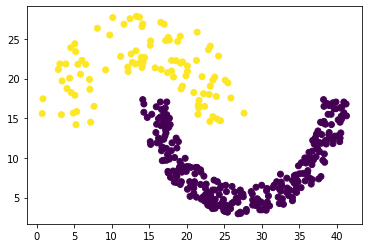

In [20]:
plt.scatter(df['x'],df['y'], c = df['c'], cmap = 'viridis' )

## K-means Clustering after scaling the data

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
X = df[['x','y']]
y = df['c']

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
df[['x','y']] = X

In [25]:
kmeans = KMeans(n_clusters = 3 , random_state = 42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [26]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

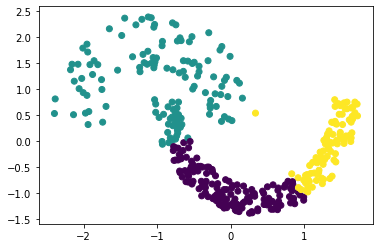

In [27]:
plt.scatter(df['x'],df['y'], c = kmeans.labels_, cmap = 'viridis' )

### Checking the best value for K


In [ ]:
#sum of Squared errors (SSE)
SSE = []

index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    print(i, kmeans.inertia_)

Text(0, 0.5, 'SSE')

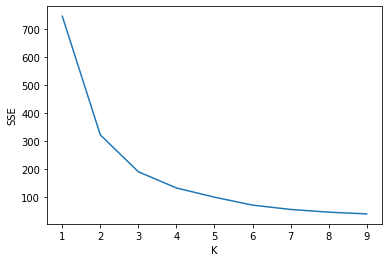

In [29]:
plt.plot(index, SSE)
plt.xlabel('K')
plt.ylabel('SSE')

### Insight: for K>= 3, SSE 